# Final Project Scoring

**Total 30 points**:

Task1: 10 Points

Task2: 5 Points

Task3: 15 points


Scoring will be based on:
- Code working with no errors and correct ML logic
- Explanation of your work, reports.

**Task 1**

- Encode data **3p**

- Handle missing values if any **1p**

- Correct errors, inconsistencies, remove duplicates if any **1p**

- Outlier detection and treatment if any **1p**

- Normalization / Standardization if necesarry **1p**

- Feature engineering **3p**

**Total: 10 p** + optional bonus score

**Task 2**

- Analyze hours-per-week Target Distribution **1p**

  - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**

**Total: 5 p** + optional bonus score

**Task 3**

- Model Selection and Setup **2p**:
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*

- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
    - Experimentation: *8p*

- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics *1p*
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

  **Total: 15 p** + optional bonus score

# Final Project optional tasks, bonus score

- Optional tasks will add bonus score, to the final_project_score
- Tough scoring for bonus tasks is not detailed, the bonus scoring will be simillar with the scoring of the required tasks.

# Bonus Point on presence and class activity

Max +1 additional bonus point for presence added to grade

Max +1 additional bonus point for activity added to grade

Total Max **2 Bonus Points added to the grade**

Note:
- Bonus points based on presence and activity has a bigger impact than the bonus score for optional tasks.
- Bonus points are added to final grade, while bonus score will be added to the final_project_score, than apply sigmoid on it.

# Final grade

final_project_score = score required tasks + score optional tasks

grade = sigmoid(final_project_score)

final_grade = grade + bonus_points

final_grade = round(final_grade)


# Sigmoid graph example

15


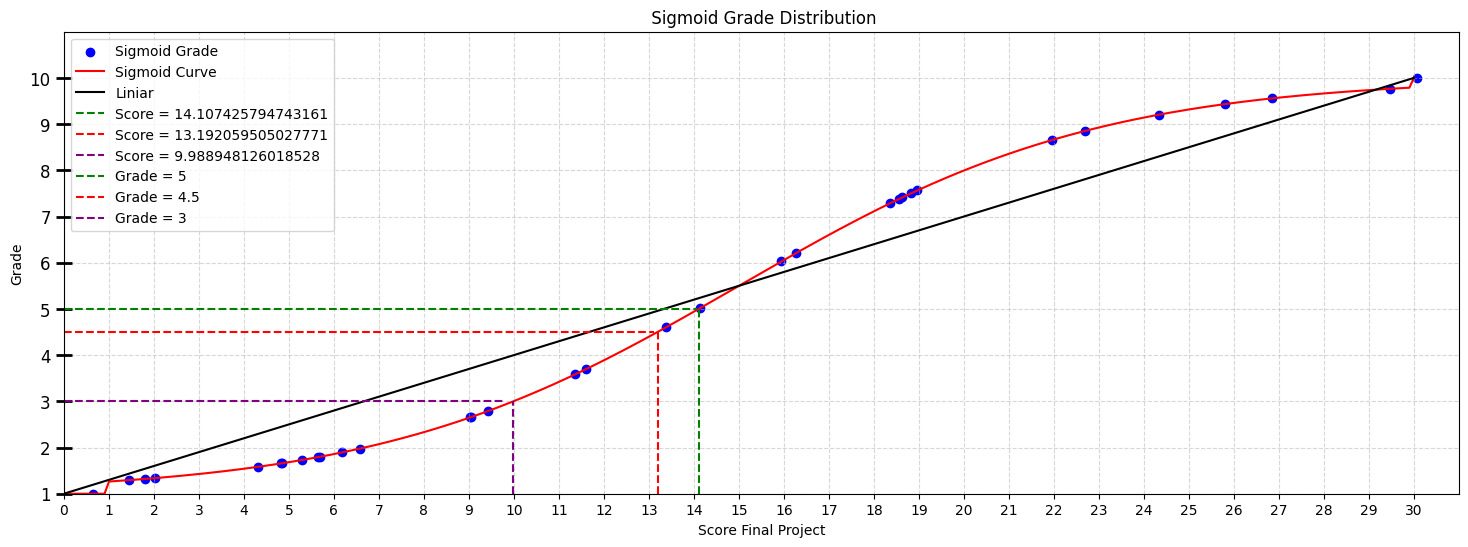

score: 0.0 grade: 1.0 final grade: 1
score: 0.5 grade: 1.0 final grade: 1
score: 1.0 grade: 1.0 final grade: 1
score: 1.5 grade: 1.3 final grade: 1
score: 2.0 grade: 1.34 final grade: 1
score: 2.5 grade: 1.38 final grade: 1
score: 3.0 grade: 1.43 final grade: 1
score: 3.5 grade: 1.48 final grade: 1
score: 4.0 grade: 1.54 final grade: 2
score: 4.5 grade: 1.61 final grade: 2
score: 5.0 grade: 1.68 final grade: 2
score: 5.5 grade: 1.77 final grade: 2
score: 6.0 grade: 1.86 final grade: 2
score: 6.5 grade: 1.96 final grade: 2
score: 7.0 grade: 2.07 final grade: 2
score: 7.5 grade: 2.2 final grade: 2
score: 8.0 grade: 2.33 final grade: 2
score: 8.5 grade: 2.48 final grade: 2
score: 9.0 grade: 2.64 final grade: 3
score: 9.5 grade: 2.82 final grade: 3
score: 10.0 grade: 3.0 final grade: 3
score: 10.5 grade: 3.21 final grade: 3
score: 11.0 grade: 3.42 final grade: 3
score: 11.5 grade: 3.65 final grade: 4
score: 12.0 grade: 3.89 final grade: 4
score: 12.5 grade: 4.14 final grade: 4
score: 13.0 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_mid = 15
k = 0.25
# Play with different x_mid and k

# Note x_mid poate sa fie 30 (score total final project) / 2 = 15 sau poate sa fie media notelor.



# Generarea punctelor pentru simulare
np.random.seed(42)  # Fixăm seed pentru reproducibilitate
x_values = np.concatenate([
    np.random.uniform(0, 31, 33),
    # np.random.uniform(x_mid, x_mid+5, 5),
    # np.random.uniform(x_mid+5, 20, 10),
    # np.random.uniform(20, 30, 15)
])
x_values.sort()
# x_mid = x_values.mean()
print(x_mid)



# Definirea funcției sigmoid scalată între 1 și 10
# Folosim sigmoid pentru a calcula nota din scorul de la final project: grade = sigmoid(score)
# Note: Sigmoid da valori intre 0 si 1. Daca inmultim valoarea sigmoid cu 10, vom avea valori intre 0 si 10.
# Daca inmultim cu 9, apoi adunam 1, vom avea valori intre 1 si 10, considerand un punct din oficiu, insa sigmoid va avea o forma scalata.
def sigmoid_scaled(x, x_mid=x_mid, k=k):
    return 1 + 9 / (1 + np.exp(-k * (x - x_mid)))
# Avem nevoie de inversa la sigmoid pentru a calcula scorul la final project din nota: score = inverse_sigmoid(grade)
# Folosim pentru a trasa linii verticale la intersectia cu notele 3, 4.5 si 5
def inverse_sigmoid(y, x_mid=x_mid, k=k):
    return x_mid - (1 / k) * np.log((9 / (y - 1)) - 1)

def clip_sigmoid_scaled(x, **kvargs):
    s = sigmoid_scaled(x, **kvargs)
    v1 = lambda x:  np.where(x < 30, s, 10)
    v =  np.where(x > 1,  v1(x), 1)
    return v


x1 = inverse_sigmoid(5)
x2 = inverse_sigmoid(4.5)
x3 = inverse_sigmoid(3)



y_values = clip_sigmoid_scaled(x_values)

plt.figure(figsize=(18, 6))
plt.scatter(x_values, y_values, color='blue', label='Sigmoid Grade')

# Generarea curbei sigmoidale
x_curve = np.linspace(0, 30, 300)
y_curve = clip_sigmoid_scaled(x_curve)
plt.plot(x_curve, y_curve, color='red', label='Sigmoid Curve')

x_lin = np.linspace(0, 30, 300)
y_lin = np.linspace(1, 10, 300)
plt.plot(x_lin, y_lin, color='black', label='Liniar')


plt.axvline(x=x1, color='green', linestyle='--', label=f'Score = {x1}', ymin=0, ymax=5/10-0.1)
plt.axvline(x=x2, color='red', linestyle='--', label=f'Score = {x2}', ymin=0, ymax=4.5/10-0.1)
plt.axvline(x=x3, color='purple', linestyle='--', label=f'Score = {x3}', ymin=0, ymax=3/10-0.1)

plt.axhline(y=5, color='green', linestyle='--', label='Grade = 5', xmin=0, xmax=(x1/30)-(1/60))
plt.axhline(y=4.5, color='red', linestyle='--', label='Grade = 4.5', xmin=0, xmax=(x2/30)-(1/60))
plt.axhline(y=3, color='purple', linestyle='--', label='Grade = 3', xmin=0, xmax=(x3/30)-(1/60))

plt.xticks(np.arange(0, 31, 1), fontsize=10)
plt.yticks(np.arange(1, 11, 1), fontsize=10)

ax = plt.gca()
ax.set_ylim(1, 11)
ax.set_xlim(0, 31)

ax.tick_params(axis='y', which='both', direction='inout', length=4)
ax.tick_params(axis='y', which='major', length=8)
ax.tick_params(axis='y', which='major', length=12, width=2, color='black',
               labelsize=12, labelcolor='black',
               grid_alpha=0.5)

plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.xlabel("Score Final Project")
plt.ylabel("Grade")
plt.title(" Sigmoid Grade Distribution")
plt.legend()

plt.show()


for i in np.arange(0, 30.5, 0.5):
  grade = clip_sigmoid_scaled(i)
  grade = np.round(grade, 2)
  print(f'score: {i} grade: {grade} final grade: {round(grade)}')